# Coursework Project
Data Pre-Processing for a Sales Forecasting Problem

DATA71011 Understanding Data and their Environment

In [811]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [812]:
dataTrain = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-data-forecast.csv')
testSet = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-testData.csv')

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_9323/2433977353.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTrain = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-data-forecast.csv')


### 1. Including Lagged Features

In [814]:
dataTrain['Date'] = pd.to_datetime(dataTrain['Date'])

In [815]:
dataTrain = dataTrain.sort_values(by=['Store', 'Date'])
dataTrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,DiffTimeMonths,PromoDate,DiffPromoTimeMonths
239,1,Tuesday,2013-01-01,0,0,0,0,Public Holiday,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0
217,1,Wednesday,2013-01-02,5530,668,1,0,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0
195,1,Thursday,2013-01-03,4327,578,1,0,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0
175,1,Friday,2013-01-04,4486,619,1,0,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0
762,1,Saturday,2013-01-05,4997,635,1,0,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0


In [816]:
# Create lagged features for each store
dataTrain['Lag_1'] = dataTrain.groupby('Store')['Sales'].shift(1)
dataTrain['Lag_7'] = dataTrain.groupby('Store')['Sales'].shift(7)
dataTrain['Rolling_Mean_7'] = dataTrain.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(7).mean())

In [817]:
# Count NaN values in lagged features
lagged_nan_counts = dataTrain[['Lag_1', 'Lag_7', 'Rolling_Mean_7']].isnull().sum()

# Display NaN counts for lagged features
print(lagged_nan_counts)

Lag_1             1115
Lag_7             7805
Rolling_Mean_7    7805
dtype: int64


In [818]:
dataTrain = dataTrain.dropna(subset=['Lag_1', 'Lag_7', 'Rolling_Mean_7'])
dataTrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,DiffTimeMonths,PromoDate,DiffPromoTimeMonths,Lag_1,Lag_7,Rolling_Mean_7
862,1,Tuesday,2013-01-08,5580,654,1,1,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0,7176.0,0.0,3788.000000
66,1,Wednesday,2013-01-09,5471,626,1,1,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0,5580.0,5530.0,4585.142857
45,1,Thursday,2013-01-10,4892,615,1,1,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0,5471.0,4327.0,4576.714286
23,1,Friday,2013-01-11,4881,592,1,1,NaN,1,Type C,Basic,1270,0,2008-09-01,82,NaN,0,4892.0,4486.0,4657.428571
1,1,Saturday,2013-01-12,4952,646,1,0,NaN,0,Type C,Basic,1270,0,2008-09-01,82,NaN,0,4881.0,4997.0,4713.857143


### 2. Running Models

First, we will run ML models with all features. We will automatically assign zero to closed stores and use only the open stores for training. These are the variables that will be used for training:

+ DayOfWeek
+ Promo
+ StateHoliday
+ SchoolHoliday
+ StoreType
+ Assortment
+ CompetitionDistance
+ Promo2
+ DiffTimeMonths
+ DiffPromoTimeMonths

### 2.1. Label Econding

In [821]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [822]:
# Transform the 'DayOfWeek' column
dataTrain['DayOfWeek_encoded'] = label_encoder.fit_transform(dataTrain['DayOfWeek'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [823]:
# Transform 'Promo' column
dataTrain['Promo_encoded'] = label_encoder.fit_transform(dataTrain['Promo'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [824]:
# Transform the 'StateHoliday' column
dataTrain['StateHoliday_encoded'] = label_encoder.fit_transform(dataTrain['StateHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Christmas': 0, 'Easter Holiday': 1, 'Public Holiday': 2, nan: 3}


In [825]:
# Transform the 'SchoolHoliday' column
dataTrain['SchoolHoliday_encoded'] = label_encoder.fit_transform(dataTrain['SchoolHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [826]:
# Transform the 'StoreType' column
dataTrain['StoreType_encoded'] = label_encoder.fit_transform(dataTrain['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Type A': 0, 'Type B': 1, 'Type C': 2, 'Type D': 3}


In [827]:
# Transform the 'Assortment' column
dataTrain['Assortment_encoded'] = label_encoder.fit_transform(dataTrain['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Basic': 0, 'Extended': 1, 'Extra': 2}


In [828]:
# Only with open stores:
trainSet = dataTrain[dataTrain['Open'] == 1]

In [829]:
# Create a copy of trainSet
forecastTrain = trainSet.copy()

In [830]:
# Final train set:
columns_drop = [
    'Store', 'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment', 'CompetitionOpenDate','PromoDate','Promo' 
]
# Drop the columns
trainSet = trainSet.drop(columns=columns_drop)
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   838814 non-null  datetime64[ns]
 1   Sales                  838814 non-null  int64         
 2   CompetitionDistance    838814 non-null  int64         
 3   Promo2                 838814 non-null  int64         
 4   DiffTimeMonths         838814 non-null  int64         
 5   DiffPromoTimeMonths    838814 non-null  int64         
 6   Lag_1                  838814 non-null  float64       
 7   Lag_7                  838814 non-null  float64       
 8   Rolling_Mean_7         838814 non-null  float64       
 9   DayOfWeek_encoded      838814 non-null  int64         
 10  Promo_encoded          838814 non-null  int64         
 11  StateHoliday_encoded   838814 non-null  int64         
 12  SchoolHoliday_encoded  838814 non-null  int64 

### 2.2. Standarization of numerical variables

In [832]:
# Standardize only the numerical variables while keeping dummy variables and encoded factors intact:
from sklearn.preprocessing import MinMaxScaler

# List numerical variables to standardize
numerical_features = [
    'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths',
    'Lag_1','Lag_7','Rolling_Mean_7'
]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to numerical features
scaled_values = scaler.fit_transform(trainSet[numerical_features])

# Replace original columns with scaled values
trainSet[numerical_features] = scaled_values

In [833]:
trainSet.tail()

,Date,Sales,CompetitionDistance,Promo2,DiffTimeMonths,DiffPromoTimeMonths,Lag_1,Lag_7,Rolling_Mean_7,DayOfWeek_encoded,Promo_encoded,StateHoliday_encoded,SchoolHoliday_encoded,StoreType_encoded,Assortment_encoded
1016326,2015-07-27,10712,-0.859441,1,-0.950938,0.070423,-1.000000,-0.707203,-0.656117,1,1,3,1,3,1
1017033,2015-07-28,8093,-0.859441,1,-0.950938,0.070423,-0.484393,-0.755770,-0.611102,5,1,3,1,3,1
1017014,2015-07-29,7661,-0.859441,1,-0.950938,0.070423,-0.610455,-0.742870,-0.581743,6,1,3,1,3,1
1016992,2015-07-30,8405,-0.859441,1,-0.950938,0.070423,-0.631248,-0.703978,-0.559191,4,1,3,1,3,1
1016970,2015-07-31,8680,-0.859441,1,-0.950938,0.070423,-0.595437,-0.720055,-0.537262,0,1,3,1,3,1


### 2.3. Exploring correlation between predictors

In [835]:
# Dropping ID columns
corrMatrix = trainSet.drop(['Sales','Date'], axis='columns')

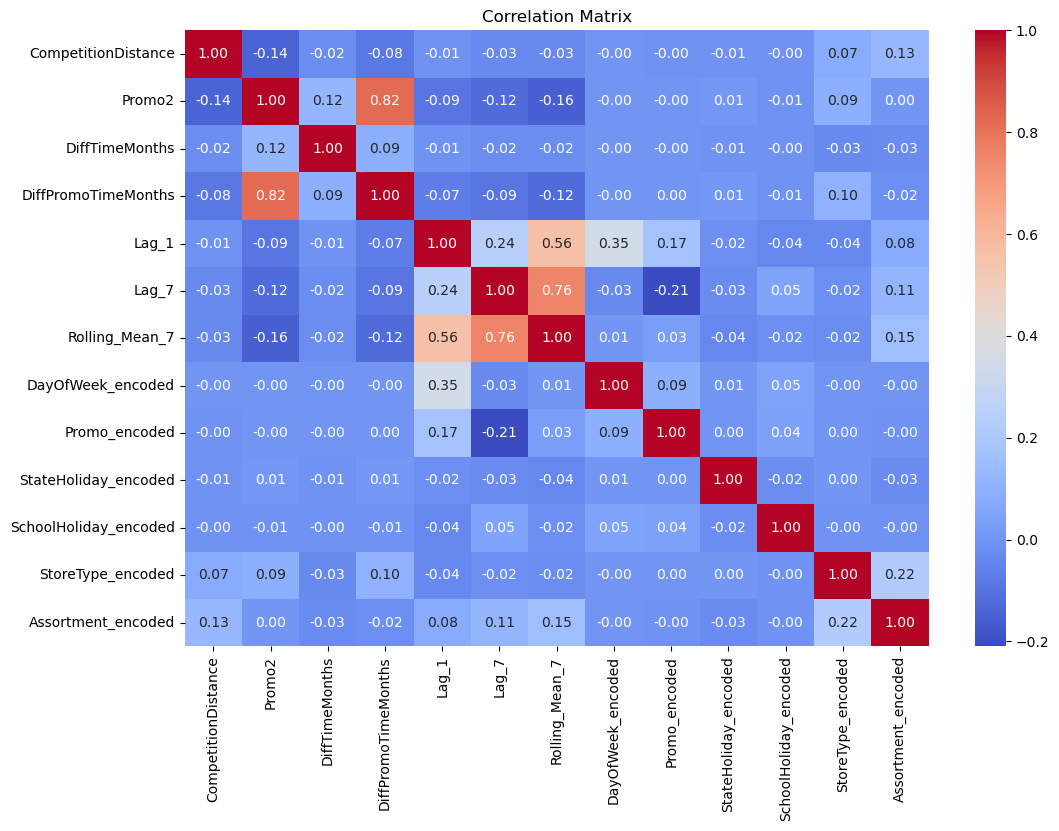

In [836]:
# Compute the correlation matrix
correlation_matrix = corrMatrix.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 3. Machine Learning

#### 3.1. Training with all Features

In [506]:
from sklearn.model_selection import train_test_split

# Ensure data is sorted by Date
trainSet = trainSet.sort_values(by='Date')

# Define cutoff date for training and testing split
cutoff_date = '2015-01-01'

# Split into training and testing sets
train_data = trainSet[trainSet['Date'] < cutoff_date]
test_data = trainSet[trainSet['Date'] >= cutoff_date]

# Separate features and target
X_train = train_data.drop(columns=['Sales', 'Date'])
y_train = train_data['Sales']

X_test = test_data.drop(columns=['Sales', 'Date'])
y_test = test_data['Sales']

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (642782, 13)
X_test shape: (196032, 13)


In [508]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define RMSPE function
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0  # Avoid division by zero
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Create custom RMSPE scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

#### OLS

In [511]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Initialize OLS (LinearRegression)
ols = LinearRegression()

# Train the OLS model on the training set
ols.fit(X_train, y_train)

# Predict on the test set
y_test_pred = ols.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


RMSPE on Test Set: 0.2794
R² on Test Set: 0.6912


#### Ridge Regression

In [514]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring function
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Create custom RMSPE scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set
ridge_grid.fit(X_train, y_train)

# Retrieve the best Ridge model
best_ridge = ridge_grid.best_estimator_

# Predict on the test set
y_test_pred = best_ridge.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


Best alpha: 1000
RMSPE on Test Set: 0.2778
R² on Test Set: 0.6863


#### Lasso Regression

In [517]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize Lasso with GridSearchCV
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning
lasso_grid.fit(X_train, y_train)

# Retrieve the best Lasso model
best_lasso = lasso_grid.best_estimator_

# Predict on the test set
y_test_pred = best_lasso.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


Best alpha: 0.0001
RMSPE on Test Set: 0.2794
R² on Test Set: 0.6912


#### MLP

In [112]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Adjust grid size
param_grid = {
    'hidden_layer_sizes': [(64,), (128,)],  # Fewer configurations
    'activation': ['relu'],  # Focus on one activation function
    'solver': ['adam'],  # Keep one solver
    'alpha': [0.0001, 0.001],  # Smaller range of regularization values
    'learning_rate': ['constant'],  # Fix learning rate
}

# Initialize MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Perform GridSearchCV
mlp_grid = GridSearchCV(mlp, param_grid, scoring=rmspe_scorer, cv=5, n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Best model
best_mlp = mlp_grid.best_estimator_

# Test set evaluation
y_test_pred = best_mlp.predict(X_test)
test_rmspe = rmspe(y_test, y_test_pred)

# Calculate R²
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print(f"Best hyperparameters: {mlp_grid.best_params_}")
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'solver': 'adam'}
RMSPE on Test Set: 0.1832
R² on Test Set: 0.8674


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3.2. Training with Selected Features

In [519]:
# Final train set:
columns_drop = [
    'Promo2','SchoolHoliday_encoded' 
]
# Drop the columns
trainSet_SF = trainSet.drop(columns=columns_drop)
trainSet_SF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  838814 non-null  datetime64[ns]
 1   Sales                 838814 non-null  int64         
 2   CompetitionDistance   838814 non-null  float64       
 3   DiffTimeMonths        838814 non-null  float64       
 4   DiffPromoTimeMonths   838814 non-null  float64       
 5   Lag_1                 838814 non-null  float64       
 6   Lag_7                 838814 non-null  float64       
 7   Rolling_Mean_7        838814 non-null  float64       
 8   DayOfWeek_encoded     838814 non-null  int64         
 9   Promo_encoded         838814 non-null  int64         
 10  StateHoliday_encoded  838814 non-null  int64         
 11  StoreType_encoded     838814 non-null  int64         
 12  Assortment_encoded    838814 non-null  int64         
dtypes

In [521]:
# Ensure data is sorted by Date
trainSet_SF = trainSet_SF.sort_values(by='Date')

# Define cutoff date for training and testing split
cutoff_date = '2015-01-01'

# Split into training and testing sets
train_data_SF = trainSet_SF[trainSet_SF['Date'] < cutoff_date]
test_data_SF = trainSet_SF[trainSet_SF['Date'] >= cutoff_date]

# Separate features and target
X_train_SF = train_data_SF.drop(columns=['Sales', 'Date'])
y_train_SF = train_data_SF['Sales']

X_test_SF = test_data_SF.drop(columns=['Sales', 'Date'])
y_test_SF = test_data_SF['Sales']

# Print shapes to confirm
print(f"X_train_SF shape: {X_train_SF.shape}")
print(f"X_test_SF shape: {X_test_SF.shape}")

X_train_SF shape: (642782, 11)
X_test_SF shape: (196032, 11)


#### OLS

In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Initialize OLS (LinearRegression)
ols = LinearRegression()

# Train the OLS model on the training set with selected features
ols.fit(X_train_SF, y_train_SF)

# Predict on the test set with selected features
y_test_pred_SF = ols.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")


RMSPE on Test Set: 0.2806
R² on Test Set: 0.6886


#### Ridge Regression

In [527]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set with selected features
ridge_grid.fit(X_train_SF, y_train_SF)

# Retrieve the best Ridge model
best_ridge_SF = ridge_grid.best_estimator_

# Predict on the test set with selected features
y_test_pred_SF = best_ridge_SF.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")


Best alpha: 1000
RMSPE on Test Set: 0.2789
R² on Test Set: 0.6839


#### Lasso Regression

In [530]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize Lasso with GridSearchCV
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set with selected features
lasso_grid.fit(X_train_SF, y_train_SF)

# Retrieve the best Lasso model
best_lasso_SF = lasso_grid.best_estimator_

# Predict on the test set with selected features
y_test_pred_SF = best_lasso_SF.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")

Best alpha: 0.0001
RMSPE on Test Set: 0.2806
R² on Test Set: 0.6886


#### MLP

In [123]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Adjust grid size
param_grid = {
    'hidden_layer_sizes': [(64,), (128,)],  # Fewer configurations
    'activation': ['relu'],  # Focus on one activation function
    'solver': ['adam'],  # Keep one solver
    'alpha': [0.0001, 0.001],  # Smaller range of regularization values
    'learning_rate': ['constant'],  # Fix learning rate
}

# Initialize MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Perform GridSearchCV
mlp_grid = GridSearchCV(mlp, param_grid, scoring=rmspe_scorer, cv=5, n_jobs=-1)
mlp_grid.fit(X_train_SF, y_train_SF)

# Best model
best_mlp_SF = mlp_grid.best_estimator_

# Test set evaluation
y_test_pred_SF = best_mlp_SF.predict(X_test_SF)
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Calculate R²
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output results
print(f"Best hyperparameters: {mlp_grid.best_params_}")
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")


Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'solver': 'adam'}
RMSPE on Test Set: 0.1856
R² on Test Set: 0.8664


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4. Forecasting Sales

#### 4.1. Lagged Features

In [858]:
# Final train set:
columns_drop = [
    'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment', 'CompetitionOpenDate','PromoDate','Promo' 
]
# Drop the columns
forecastTrain = forecastTrain.drop(columns=columns_drop)
forecastTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  838814 non-null  int64         
 1   Date                   838814 non-null  datetime64[ns]
 2   Sales                  838814 non-null  int64         
 3   CompetitionDistance    838814 non-null  int64         
 4   Promo2                 838814 non-null  int64         
 5   DiffTimeMonths         838814 non-null  int64         
 6   DiffPromoTimeMonths    838814 non-null  int64         
 7   Lag_1                  838814 non-null  float64       
 8   Lag_7                  838814 non-null  float64       
 9   Rolling_Mean_7         838814 non-null  float64       
 10  DayOfWeek_encoded      838814 non-null  int64         
 11  Promo_encoded          838814 non-null  int64         
 12  StateHoliday_encoded   838814 non-null  int64 

In [860]:
# Standardize only the numerical variables while keeping dummy variables and encoded factors intact:
from sklearn.preprocessing import MinMaxScaler

# List numerical variables to standardize
numerical_features = [
    'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths',
    'Lag_1','Lag_7','Rolling_Mean_7'
]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to numerical features
scaled_values = scaler.fit_transform(forecastTrain[numerical_features])

# Replace original columns with scaled values
forecastTrain[numerical_features] = scaled_values

In [862]:
# Sort forecastTrain by Store and Date
forecastTrain_sorted = forecastTrain.sort_values(by=['Store', 'Date'])

# Retrieve the last available raw sales (Lag_1) for each store
last_day_sales = forecastTrain_sorted.groupby('Store').tail(1).rename(columns={'Sales': 'Raw_Lag_1'})

# Retrieve sales from 7 days ago (Lag_7) for each store
seven_days_ago_sales = (
    forecastTrain_sorted.groupby('Store').tail(7)
    .groupby('Store')
    .head(1)
    .rename(columns={'Sales': 'Raw_Lag_7'})
)

# Merge raw lagged features into a single DataFrame
historical_sales = pd.merge(
    last_day_sales[['Store', 'Raw_Lag_1']],
    seven_days_ago_sales[['Store', 'Raw_Lag_7']],
    on='Store'
)

In [864]:
# Ensure forecastTrain is sorted by Store and Date
forecastTrain_sorted = forecastTrain.sort_values(by=['Store', 'Date'])

# Calculate the rolling mean (7 days) for each store
forecastTrain_sorted['Rolling_Mean_7'] = (
    forecastTrain_sorted.groupby('Store')['Sales']
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# Retrieve the last available rolling mean for each store
rolling_mean_7 = (
    forecastTrain_sorted.groupby('Store').tail(1)[['Store', 'Rolling_Mean_7']]
)

In [866]:
# Merge the two tables on 'Store'
merged_data = pd.merge(
    left=rolling_mean_7,  # Replace with the name of the first table
    right=historical_sales,  # Replace with the name of the second table
    on='Store',
    how='inner'  # Use 'inner' join as both tables have the same number of entries for 'Store'
)

# Display the merged data
print(merged_data.head())

   Store  Rolling_Mean_7  Raw_Lag_1  Raw_Lag_7
0      1     4892.571429       5263       3706
1      2     5242.428571       6064       3854
2      3     7261.428571       8314       5080
3      4    10661.000000      13995       8322
4      5     4950.142857       4822       3815


In [868]:
# Rename the columns
merged_data = merged_data.rename(columns={
    'Store': 'Store',
    'Rolling_Mean_7': 'Rolling_Mean_7',
    'Raw_Lag_1': 'Lag_1',
    'Raw_Lag_7': 'Lag_7'
})

# Display the updated DataFrame
print(merged_data.head())

   Store  Rolling_Mean_7  Lag_1  Lag_7
0      1     4892.571429   5263   3706
1      2     5242.428571   6064   3854
2      3     7261.428571   8314   5080
3      4    10661.000000  13995   8322
4      5     4950.142857   4822   3815


In [870]:
# Merge the lagged features into testSet
testSet = pd.merge(testSet, merged_data, on='Store', how='left')

In [874]:
testSet.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,DiffTimeMonths,DiffPromoTimeMonths,Rolling_Mean_7,Lag_1,Lag_7
41083,1115,Sunday,2015-08-23,NaN,NaN,0.0,0,NaN,1,Type D,Extended,5350,1,34,38,8037.714286,8680,5816
41084,1115,Monday,2015-09-14,NaN,NaN,1.0,1,NaN,0,Type D,Extended,5350,1,34,38,8037.714286,8680,5816
41085,1115,Saturday,2015-08-08,NaN,NaN,1.0,0,NaN,1,Type D,Extended,5350,1,34,38,8037.714286,8680,5816
41086,1115,Sunday,2015-08-30,NaN,NaN,0.0,0,NaN,1,Type D,Extended,5350,1,34,38,8037.714286,8680,5816
41087,1115,Saturday,2015-08-01,NaN,NaN,1.0,0,NaN,1,Type D,Extended,5350,1,34,38,8037.714286,8680,5816


#### Preparing Test Set

In [876]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [878]:
# Transform the 'DayOfWeek' column
testSet['DayOfWeek_encoded'] = label_encoder.fit_transform(testSet['DayOfWeek'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [880]:
# Transform 'Promo' column
testSet['Promo_encoded'] = label_encoder.fit_transform(testSet['Promo'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [882]:
# Define the custom mapping, including NaN explicitly
custom_mapping = {
    'Public Holiday': 2,
    np.nan: 3  # Explicitly handle NaN
}

# Use a lambda function to handle NaN values with map()
testSet['StateHoliday_encoded'] = testSet['StateHoliday'].apply(
    lambda x: custom_mapping.get(x, 3) if pd.isna(x) else custom_mapping.get(x)
)
print("Label Mapping:", custom_mapping)

Label Mapping: {'Public Holiday': 2, nan: 3}


In [884]:
# Transform the 'SchoolHoliday' column
testSet['SchoolHoliday_encoded'] = label_encoder.fit_transform(testSet['SchoolHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [886]:
# Transform the 'StoreType' column
testSet['StoreType_encoded'] = label_encoder.fit_transform(testSet['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Type A': 0, 'Type B': 1, 'Type C': 2, 'Type D': 3}


In [888]:
# Transform the 'Assortment' column
testSet['Assortment_encoded'] = label_encoder.fit_transform(testSet['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Basic': 0, 'Extended': 1, 'Extra': 2}


In [890]:
# Only with open stores. Use testSet for the final composition of data with closed stores.
forecasting_testSet = testSet[testSet['Open'] == 1]

In [892]:
# Final train set:
columns_drop = [
    'Store', 'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment','Promo' 
]
# Drop the columns
forecasting_testSet = forecasting_testSet.drop(columns=columns_drop)
forecasting_testSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   35093 non-null  object 
 1   Sales                  0 non-null      float64
 2   CompetitionDistance    35093 non-null  int64  
 3   Promo2                 35093 non-null  int64  
 4   DiffTimeMonths         35093 non-null  int64  
 5   DiffPromoTimeMonths    35093 non-null  int64  
 6   Rolling_Mean_7         35093 non-null  float64
 7   Lag_1                  35093 non-null  int64  
 8   Lag_7                  35093 non-null  int64  
 9   DayOfWeek_encoded      35093 non-null  int64  
 10  Promo_encoded          35093 non-null  int64  
 11  StateHoliday_encoded   35093 non-null  int64  
 12  SchoolHoliday_encoded  35093 non-null  int64  
 13  StoreType_encoded      35093 non-null  int64  
 14  Assortment_encoded     35093 non-null  int64  
dtypes: floa

In [896]:
# Standardize only the numerical variables while keeping dummy variables and encoded factors intact:
from sklearn.preprocessing import MinMaxScaler

# List numerical variables to standardize
numerical_features = [
    'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths',
    'Lag_1','Lag_7','Rolling_Mean_7'
]

forecasting_testSet[numerical_features] = scaler.transform(forecasting_testSet[numerical_features])

In [918]:
forecasting_testSet.head()

,Date,Sales,CompetitionDistance,Promo2,DiffTimeMonths,DiffPromoTimeMonths,Rolling_Mean_7,Lag_1,Lag_7,DayOfWeek_encoded,Promo_encoded,StateHoliday_encoded,SchoolHoliday_encoded,StoreType_encoded,Assortment_encoded
0,2015-09-17,NaN,-0.967036,0,-0.881674,-1.0,-0.66695,-0.746673,-0.821617,4,1,3,0,2,0
1,2015-08-19,NaN,-0.967036,0,-0.881674,-1.0,-0.66695,-0.746673,-0.821617,6,1,3,1,2,0
2,2015-09-10,NaN,-0.967036,0,-0.881674,-1.0,-0.66695,-0.746673,-0.821617,4,0,3,0,2,0
3,2015-08-04,NaN,-0.967036,0,-0.881674,-1.0,-0.66695,-0.746673,-0.821617,5,1,3,1,2,0
4,2015-08-26,NaN,-0.967036,0,-0.881674,-1.0,-0.66695,-0.746673,-0.821617,6,0,3,1,2,0


#### Running MLP with the whole training set

In [914]:
trainSet.tail()

,Date,Sales,CompetitionDistance,Promo2,DiffTimeMonths,DiffPromoTimeMonths,Lag_1,Lag_7,Rolling_Mean_7,DayOfWeek_encoded,Promo_encoded,StateHoliday_encoded,SchoolHoliday_encoded,StoreType_encoded,Assortment_encoded
1016326,2015-07-27,10712,-0.859441,1,-0.950938,0.070423,-1.000000,-0.707203,-0.656117,1,1,3,1,3,1
1017033,2015-07-28,8093,-0.859441,1,-0.950938,0.070423,-0.484393,-0.755770,-0.611102,5,1,3,1,3,1
1017014,2015-07-29,7661,-0.859441,1,-0.950938,0.070423,-0.610455,-0.742870,-0.581743,6,1,3,1,3,1
1016992,2015-07-30,8405,-0.859441,1,-0.950938,0.070423,-0.631248,-0.703978,-0.559191,4,1,3,1,3,1
1016970,2015-07-31,8680,-0.859441,1,-0.950938,0.070423,-0.595437,-0.720055,-0.537262,0,1,3,1,3,1


Next steps:

- Run MLP with whole data
- Iterative predictions (forecasting_testSet is ready).